In [19]:
import pandas as pd
import sklearn
from sklearn import metrics
from sklearn import preprocessing
import logistic_regression as lr
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
import seaborn as sns

In [16]:
#dir_transfer = '../../tissue_spec_tl/
dir_speer = '../src/speer_'
dir_speer_no_transfer = '../src/speer_no_transfer_'
datasets = ['one', 'five', 'ten', 'twenty_five', 'fifty', 'seventy_five']
tissues = ['brain', 'digestive', 'muscle', 'group1', 'epithelial']
auc_transfer = []
auc_notransfer = []
for dataset in datasets:
    path_transfer = dir_speer + dataset + '_percent_train_stronger_effects_sim/'
    path_notransfer = dir_speer_no_transfer + dataset + '_percent_train_stronger_effects_sim/'
    # read in data
    transfer_model = pd.read_csv(str(path_transfer) + 'test.csv')
    no_transfer_model = pd.read_csv(str(path_notransfer) + 'test.csv')
    auc_tissues_transfer = []
    auc_tissues_notransfer = []
    for tissue in tissues:
        data = transfer_model[transfer_model["tissue"] == tissue]
        auc_tissues_transfer.append(sklearn.metrics.roc_auc_score(data["z_labels"], data["posterior"]))
        
        data = no_transfer_model[no_transfer_model["tissue"] == tissue]
        auc_tissues_notransfer.append(sklearn.metrics.roc_auc_score(data["z_labels"], data["posterior"]))
    auc_transfer.append(np.mean(auc_tissues_transfer))
    auc_notransfer.append(np.mean(auc_tissues_notransfer))

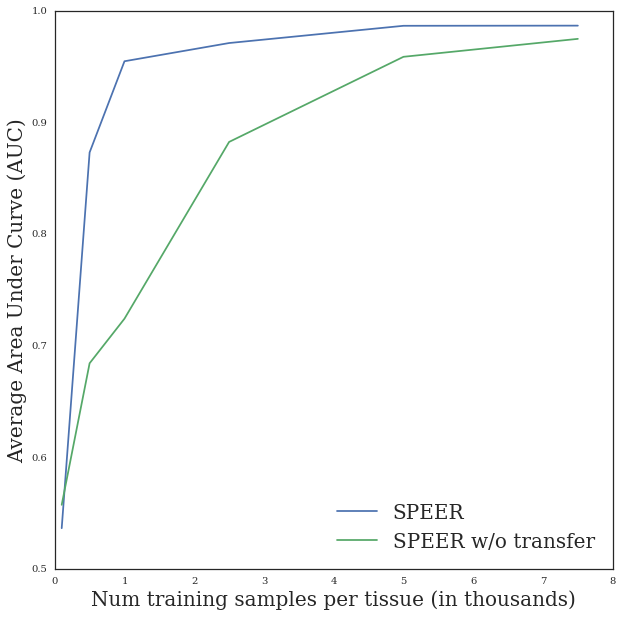

In [36]:
%matplotlib inline
x_labels = [.1, .5, 1, 2.5, 5, 7.5]
plt.style.use("seaborn-paper")
fig = plt.figure(figsize=(10,10))

sns.set_context("paper")
sns.set_palette("deep")
sns.set(font='serif')
sns.set_style("white", {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]})
ax = plt.plot(x_labels, auc_transfer, label='SPEER')
ax = plt.plot(x_labels, auc_notransfer, label='SPEER w/o transfer')
plt.xlabel("Num training samples per tissue (in thousands)", fontsize=20)
plt.ylabel("Average Area Under Curve (AUC)", fontsize=20)
plt.legend(loc='lower right', fontsize=20)
plt.savefig('num_samples_versus_auc.png', format='png', dpi=125) # This does, too